#		 					Pre Lab 8 HMM Report
谭树杰 11849060


In [11]:
import pandas as pd
# import pandas
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil
import hmmlearn


In [12]:
def get_price(filename, name, start_date, end_date):
    data = pd.read_csv(filename, engine='python', encoding='utf-8')
    data[["Date"]] = data[["Date"]].astype('<M8[ns]')
    data = data[data.Name == name]
    tmp = data[data.Date > start_date]
    data2 = tmp[tmp.Date < end_date]
    return data2


,Symbol,Name,Date,Open,Low,High,Close,Volume,Amount
1526,SH000001,上证指数,1997-01-02,914.06,909.46,920.19,919.43,2653037,2.369874e+09
1527,SH000001,上证指数,1997-01-03,921.10,896.99,922.39,899.61,3429165,2.822564e+09
1528,SH000001,上证指数,1997-01-06,890.98,875.88,892.02,876.49,2416088,1.894047e+09
1529,SH000001,上证指数,1997-01-07,872.80,871.78,903.00,898.17,2518248,1.963756e+09
1530,SH000001,上证指数,1997-01-08,899.83,887.22,902.52,896.40,2313690,1.880559e+09


#1.	Extract the data of “SH000001” from 1997-01-01 to 2005-12-31;

In [14]:
# We can see the required data of first 5 lines 
data = get_price("1990-201310日线.csv", "上证指数", "1997-01-01", "2005-12-31")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
data.head(5)

,Symbol,Name,Date,Open,Low,High,Close,Volume,Amount
1526,SH000001,上证指数,1997-01-02,914.06,909.46,920.19,919.43,2653037,2.369874e+09
1527,SH000001,上证指数,1997-01-03,921.10,896.99,922.39,899.61,3429165,2.822564e+09
1528,SH000001,上证指数,1997-01-06,890.98,875.88,892.02,876.49,2416088,1.894047e+09
1529,SH000001,上证指数,1997-01-07,872.80,871.78,903.00,898.17,2518248,1.963756e+09
1530,SH000001,上证指数,1997-01-08,899.83,887.22,902.52,896.40,2313690,1.880559e+09


#2. According to the “Open”, “Close”, “High”, “Low” and “Volume”, you can arbitratly pick some of these indicators as the features to train the hidden markov model(HMM); you can use the third party toolbox, such as “hmmlearn”;


In [15]:

def get_features(filename, name, start_date, end_date):
    data = get_price(filename,name, start_date, end_date)
    volume = data["Volume"]     # Get data on daily volume and closing price
    close = data["Close"]
    # Calculate the logarithmic difference of the daily maximum and minimum prices as an indicator of the feature state
    logDel = np.log(np.array(data['High']))-np.log(np.array(data['Low']))
    # Calculate the exponential logarithmic yield difference every 5 days as an indicator of the feature state.
    logRet_1 = np.array(np.diff(np.log(close)))
    logRet_5 = np.log(np.array(close[5:]))-np.log(np.array(close[:-5]))
    # The logarithmic difference of the index volume per 5 days is calculated as an indicator of the feature state.
    logVol_5 = np.log(np.array(volume[5:]))-np.log(np.array(volume[:-5]))
    logDel = logDel[5:]
    logRet_1 = logRet_1[4:]
    close = close[5:]
    Date = data.Date[5:]
    A = np.column_stack([logDel, logRet_5, logVol_5])
    return A, Date, close, logRet_1


In [21]:
from hmmlearn.hmm import GaussianHMM
n = 4  # 4 hidden states
A, Date, close, logRet_1 = get_features("1990-201310日线.csv", "上证指数", "1997-01-01", "2005-12-31" )
# A = A[:, 1:3]
print(A)

In [ ]:
# train the model
model = GaussianHMM(n_components=n, covariance_type='full', n_iter=2000).fit(A)


# 3. Please test your model on the data of “SH000001” from 2005-02-01 to 2007-12-31. You should give the figures including the prdictions of your model and the hidden states

In [ ]:
# test the model on the data of “SH000001” from 2005-02-01 to 2007-12-31
B, Date, close, logRet_1 = get_features("1990-201310日线.csv", "上证指数", "2005-02-01", "2007-12-31" )
hidden_states = model.predict(B)
print(hidden_states)


In [36]:
# the figure is shown below
plt.figure(figsize=(25, 18))
for i in range(model.n_components):
    pos = (hidden_states == i)
    plt.plot_date(Date[pos], close[pos], 'o', label='hidden state %d' % i, lw=2)
    plt.legend(loc='right')
plt.show()

# 4. Please set another set of prior distributions, transition probability matrix of your model, and compare the results of these 2 models

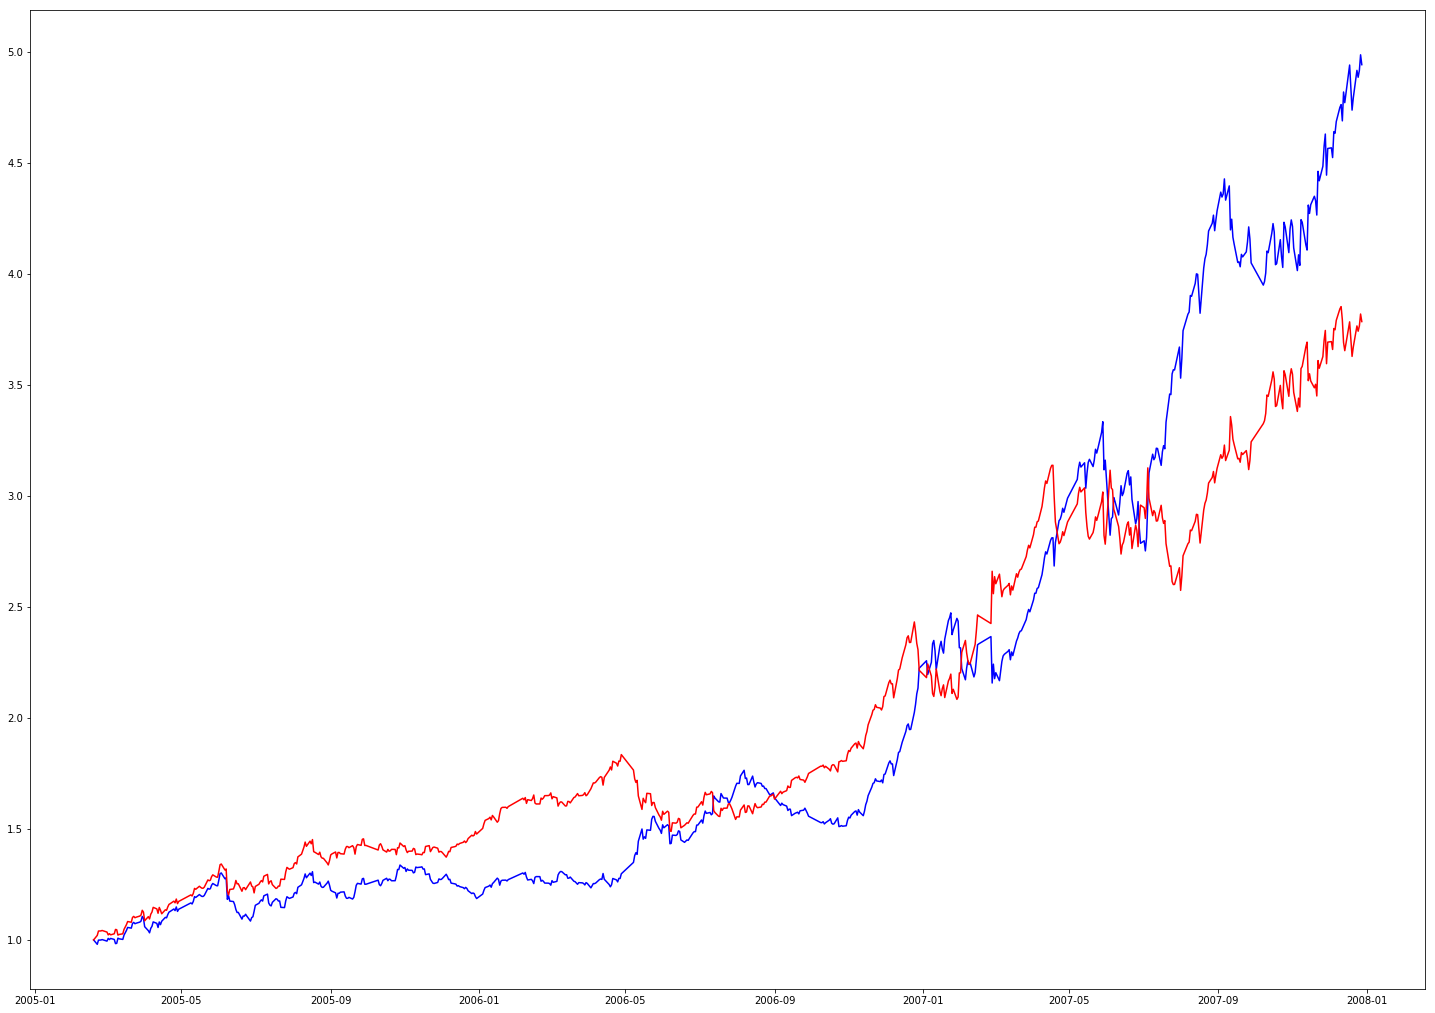

In [44]:
# the results of these 2 models are shown below
plt.figure(figsize=(25, 18))
res = pd.DataFrame({'Date':Date, 'logRet_1':logRet_1, 'state': hidden_states}).set_index('Date')
df = res.logRet_1
long = (hidden_states==0) + (hidden_states == 3)
short = (hidden_states==1) + (hidden_states == 2)
long = np.append(0,long[:-1])
short = np.append(0,short[:-1])
res['ret'] = df.multiply(long) - df.multiply(short)
plt.plot_date(Date, np.exp(res['ret'].cumsum()), 'b-', label='hidden state')


# set another set of transition probability matrix of the model
model2 = GaussianHMM(n_components=n, covariance_type='diag', n_iter=2000).fit(A)
hidden_states = model2.predict(B)
res = pd.DataFrame({'Date':Date, 'logRet_1':logRet_1, 'state': hidden_states}).set_index('Date')
df = res.logRet_1
long = (hidden_states==0) + (hidden_states == 3)
short = (hidden_states==1) + (hidden_states == 2)
long = np.append(0,long[:-1])
short = np.append(0,short[:-1])
res['ret'] = df.multiply(long) - df.multiply(short)
plt.plot_date(Date, np.exp(res['ret'].cumsum()), 'r-', label='hidden state 2')